In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import time
from pathlib import Path
import pytesseract
from PIL import Image
from tqdm.autonotebook import tqdm
from functools import reduce
import operator 

def imshow(x):
    fig = plt.figure()
    plt.imshow(x)
    return fig

frames_dir = Path('/home/francesco/Documents/Kanga-Challenge/source/dataset/videos/evo2014/frames/')

## Exploring Traces
Text will usually be present in at least 3/4 frames since it has to be read by humans. We can try to see if we are able to mask it correctly

In [6]:
from data import VideoDataset
from torch.utils.data import DataLoader, random_split

In [7]:
def imread_convert(x):
    x = cv2.imread(str(x))
    if x is not None:
        x = cv2.resize(x, (320, 320))
        x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    return x

paths = list(frames_dir.glob('*.jpg'))
paths.sort(key=lambda a: int(a.name.split('.')[0]))
frames = list(tqdm(map(imread_convert, paths)))


<IPython.core.display.Javascript object>


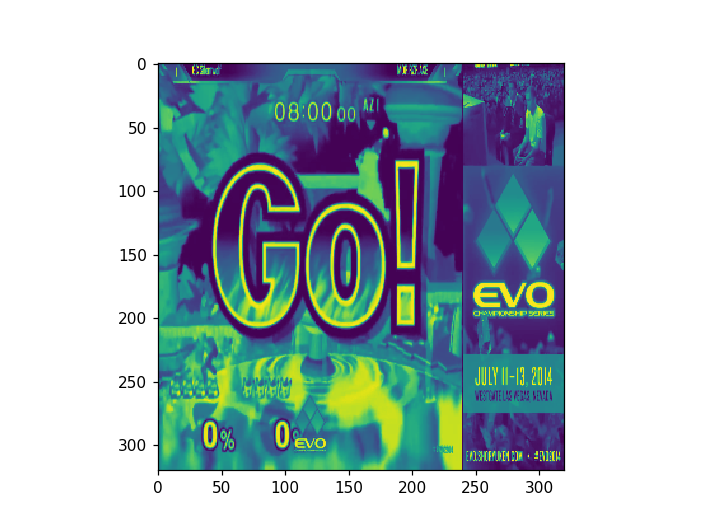

<IPython.core.display.Javascript object>


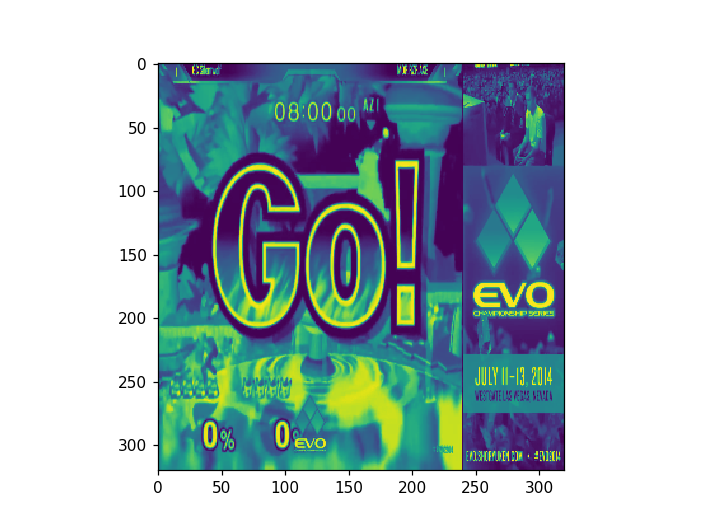

In [49]:
imshow(frames[195])

In [94]:
x = frames[600].astype(np.float) - frames[661].astype(np.float)
mask = np.zeros_like(x)
indices = x[-0.1 < x &  x > 0.1]
mask[indices] = 255
# x[x > 0] = 255
# x[x < 0] = 0
plt.imshow(mask, cmap = 'gray')

SyntaxError: invalid syntax (<ipython-input-94-e00f6f37edbf>, line 3)

## Find text in image
We can use something like this
[EAST: An Efficient and Accurate Scene Text Detector
](https://arxiv.org/abs/1704.03155)
### OpenCV
https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/

In [52]:
from detection import TextDetector

<IPython.core.display.Javascript object>


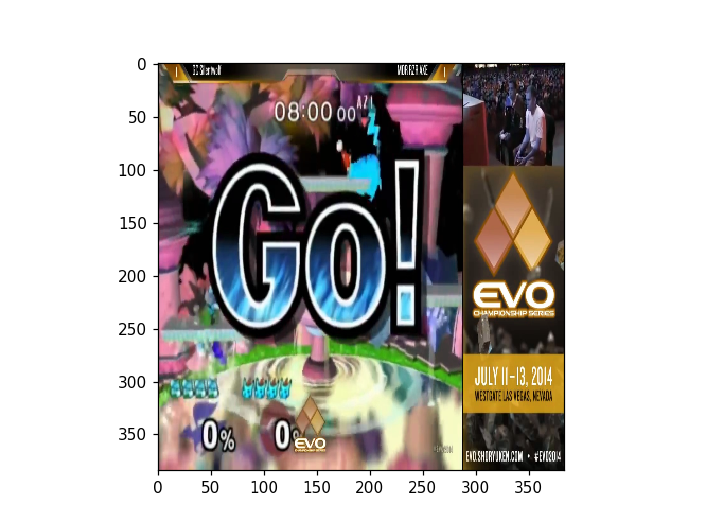

(384, 384, 3)


2019-12-05 22:45:31,059 - [INFO] - Text detection took 0.202084 seconds


In [198]:
file_path =  '/home/francesco/Documents/Kanga-Challenge/source/dataset/videos/evo2014/frames/196.jpg'

img = cv2.imread(file_path)
det = TextDetector()
det([img])

<IPython.core.display.Javascript object>


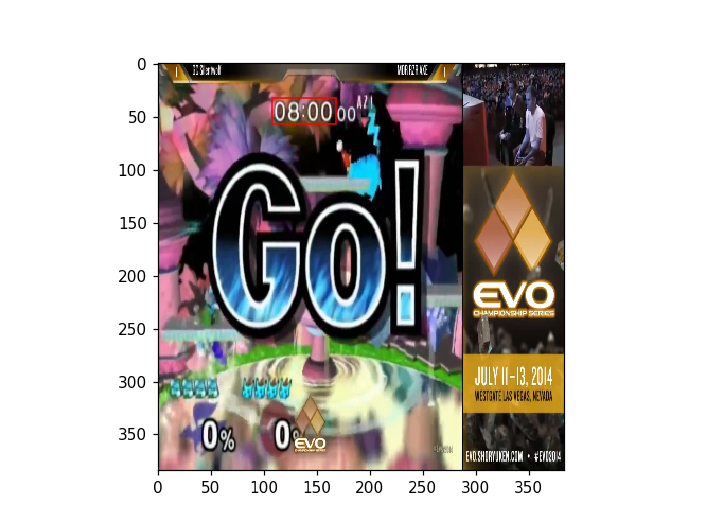

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fefa27aa510>)

In [187]:
det.plot_boxes(img_r)

In [ ]:
from PIL import Image
import pytesseract


print(pytesseract.image_to_string(Image.open(file_path).convert('LA')))

## Yolo


In [3]:
from Project import Project
import torch
from pathlib import Path
from data.transformation import Yolov3Transform
from detection import Yolov3Detector, OCRDetector
from detection.Yolov3Detector import Yolov3Prediction
import cv2
import numpy as np
from torchvision.transforms import Compose, Lambda, ToTensor
import matplotlib.pyplot as plt
from dataclasses import dataclass
import pprint

classes = {0: 'player', 1: 'time', 2: 'stocks', 3: 'damage'}
transform = Compose([
    Yolov3Transform(),
    ToTensor(),
])

detector = Yolov3Detector(weights='./yolov3/weights/best.pt',
                  cfg='./yolov3/cfg/yolov3-tiny-frames.cfg',
                  view_img=True,
                  classes=classes,
                  transform=transform)

root = Project().data_dir / 'videos' / 'evo2014' / 'frames'

img = cv2.imread('./yolov3/data/samples/160.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
preds = detector([img], conf_thres=0.5)
# yolov3_pred = Yolov3Prediction(preds[0])
pprint.pprint(preds)

/home/francesco/anaconda3/envs/dl/lib/python3.7/site-packages/imgaug/imgaug.py:182: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)



[tensor([[2.45000e+02, 5.53000e+02, 4.09000e+02, 5.92000e+02, 9.80988e-01, 9.99990e-01, 2.00000e+00],
        [3.70000e+01, 5.49000e+02, 1.93000e+02, 5.95000e+02, 9.71229e-01, 9.99951e-01, 2.00000e+00],
        [1.31000e+02, 6.21000e+02, 1.89000e+02, 6.90000e+02, 9.14900e-01, 9.99973e-01, 3.00000e+00],
        [5.30000e+02, 2.65000e+02, 7.63000e+02, 4.09000e+02, 7.28347e-01, 9.97659e-01, 0.00000e+00],
        [3.81000e+02, 5.40000e+01, 6.34000e+02, 1.16000e+02, 7.26415e-01, 9.99978e-01, 1.00000e+00],
        [6.80000e+01, 1.91000e+02, 1.60000e+02, 2.63000e+02, 6.71860e-01, 8.87411e-01, 3.00000e+00],
        [3.49000e+02, 6.14000e+02, 4.10000e+02, 6.83000e+02, 6.70777e-01, 9.99912e-01, 3.00000e+00]])]


## EAST + tesseract
form the player names

<IPython.core.display.Javascript object>


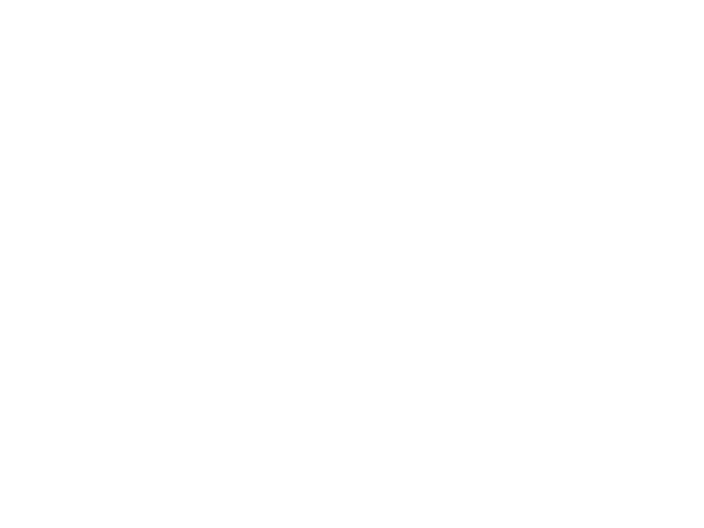

<IPython.core.display.Javascript object>


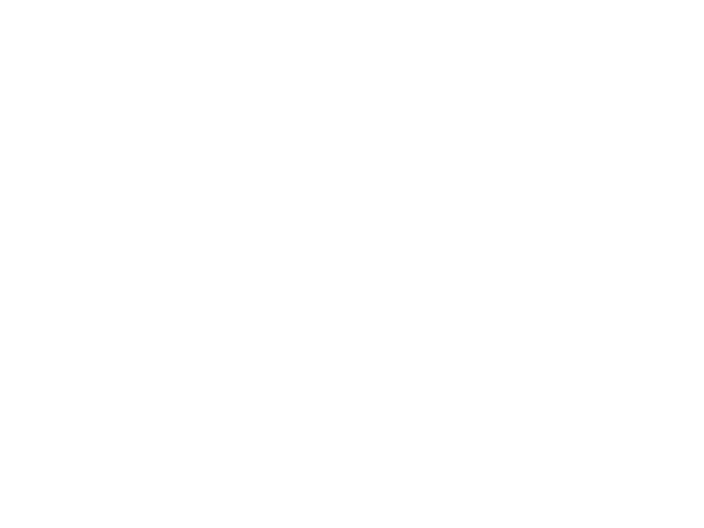

2019-12-15 15:40:53,782 - [INFO] - Text detection took 0.450182 seconds


<IPython.core.display.Javascript object>


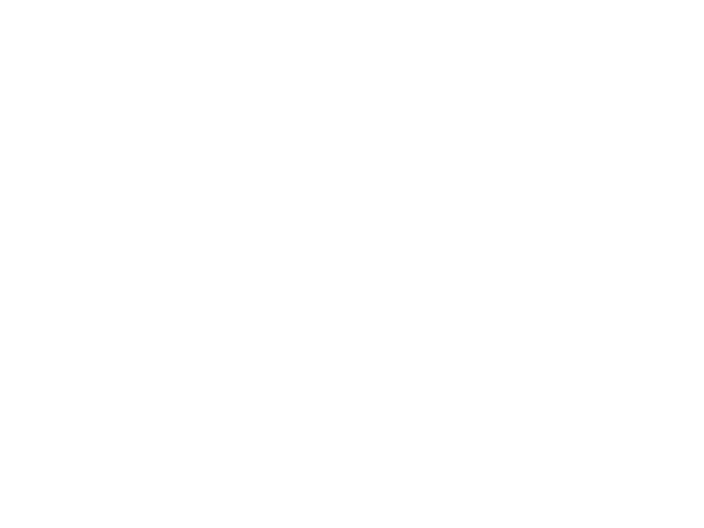

'MDR WAX'

In [294]:
from detection import EASTTextDetector

_ = imshow(img)
east_detector = EASTTextDetector()
img.shape[0]
x = int(time['coord'][1])
y = int(time['coord'][0])
y2 = int(time['coord'][2])
left_time, right_time = img[:x, :y], img[:x, y2:]
# left_time = cv2.cvtColor(left_time, cv2.COLOR_RGB2GRAY)
# left_time = left_time > 
left_time = cv2.resize(left_time, (left_time.shape[1] * 4, left_time.shape[0] * 4))

pad_top_bottom = right_time.shape[1] - left_time.shape[0]

# make a square
right_time = cv2.copyMakeBorder(right_time, pad_top_bottom // 2, pad_top_bottom//2, 0,0, cv2.BORDER_CONSTANT,
    value=[0,0,0])
_ = imshow(right_time)

right_time = cv2.resize(right_time, (320, 320))

east_detector([right_time])
box = east_detector.boxes[0]
x1, y1, x2, y2 = box
crop = right_time[y1:y2, x1:x2]
# east_detector.boxes
# east_detector.plot_boxes(right_time)

# # _ = imshow(right_time)
# crop = cv2.resize(crop, (crop.shape[1] * 4, crop.shape[0] * 4))
crop = cv2.copyMakeBorder(crop, 28, 28, 28,28, cv2.BORDER_CONSTANT, value=[0,0,0])
_ = imshow(crop)

x = Image.fromarray(crop)

text = pytesseract.image_to_string(x, lang='eng', config='--psm 7 --oem 0')
text

## Sorting predictions

In [220]:
tmp = preds[0].tolist()
tmp.sort(key=lambda x: (x[0], x[1]))

tmp

[[37.0, 549.0, 193.0, 595.0, 0.9712285399436951, 0.9999514818191528, 2.0],
 [68.0, 191.0, 160.0, 263.0, 0.6718599796295166, 0.8874111771583557, 3.0],
 [131.0, 621.0, 189.0, 690.0, 0.9148997664451599, 0.9999732971191406, 3.0],
 [245.0, 553.0, 409.0, 592.0, 0.9809877276420593, 0.9999902248382568, 2.0],
 [349.0, 614.0, 410.0, 683.0, 0.670776903629303, 0.9999121427536011, 3.0],
 [381.0, 54.0, 634.0, 116.0, 0.7264147400856018, 0.9999784231185913, 1.0],
 [530.0, 265.0, 763.0, 409.0, 0.7283468246459961, 0.9976588487625122, 0.0]]

In [424]:

@dataclass
class DetectionPerClass:
    detectors : dict = None
        
    def __call__(self, detections):
        return [ {det.cls: self.detectors[det.cls](det.crop)} for det in detections  if det.cls in self.detectors]
 

In [17]:
classes

{0: 'player', 1: 'time', 2: 'stocks', 3: 'damage'}

In [ ]:
from scipy import signal.convolve2d


In [50]:
x = list(ObjectDetection.from_yolov3(preds[0], src=img))[0]
x.area

[245 553 409 592]


6396

<IPython.core.display.Javascript object>


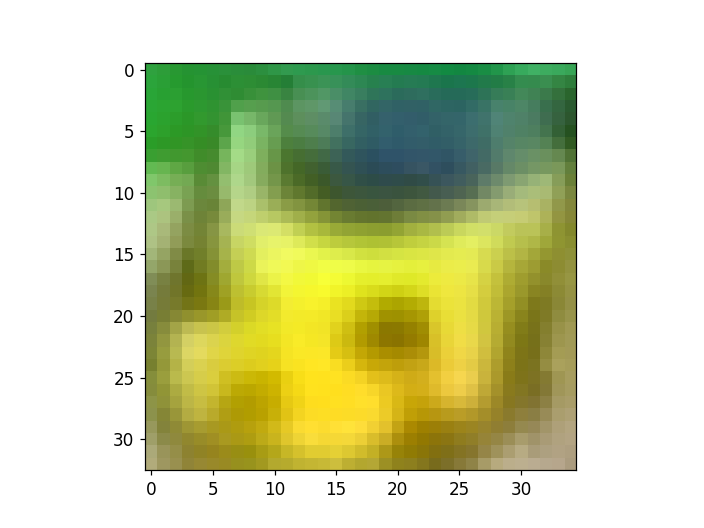

In [44]:
from detection.Detection import ObjectDetection

stock_img = list(filter(lambda det : det.cls == 2, ObjectDetection.from_yolov3(preds[0], src=img)))[0].crop

single_stock = imshow(stock_img[6:, 20:55])

In [31]:
stock_img.shape

(39, 164, 3)

<IPython.core.display.Javascript object>


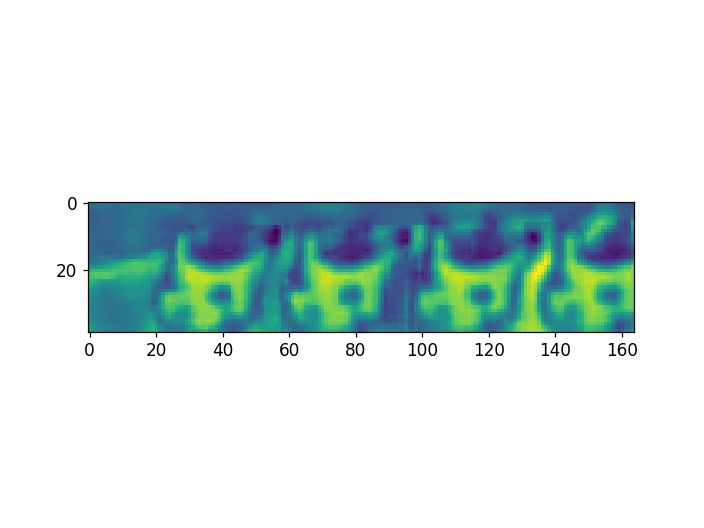

<IPython.core.display.Javascript object>


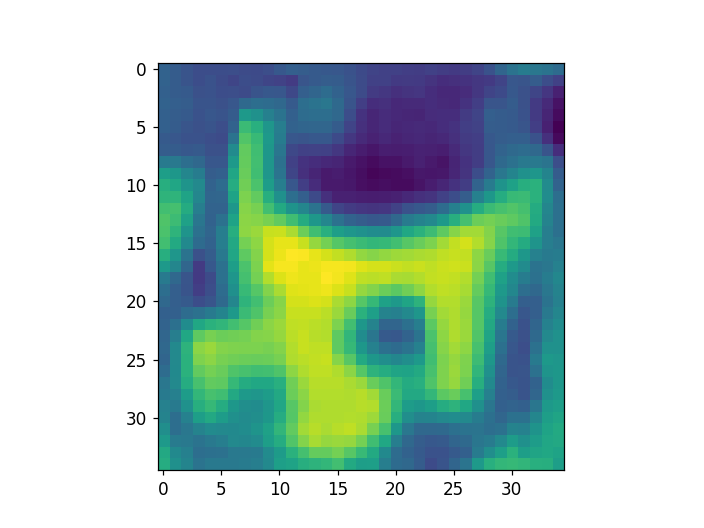

<IPython.core.display.Javascript object>


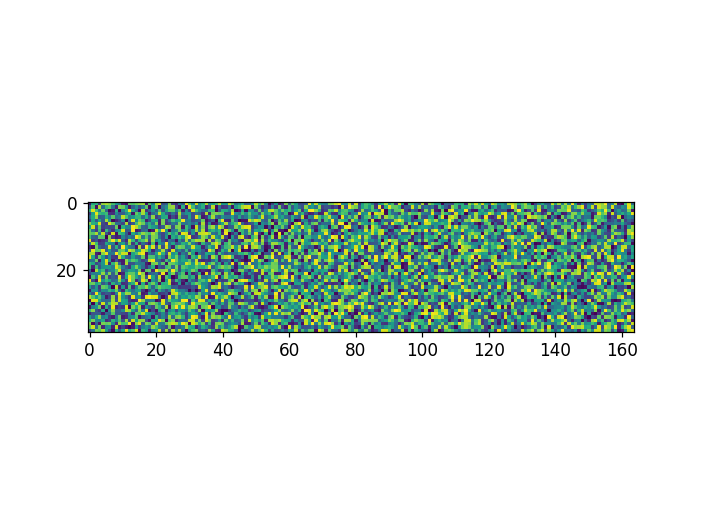

In [43]:
from scipy.signal import convolve2d

stock_img_gr = cv2.cvtColor(stock_img, cv2.COLOR_RGB2GRAY)
_ = imshow(stock_img_gr)
single_stock = stock_img_gr[6:, 20:55]
single_stock = cv2.resize(single_stock, (35, 35))
imshow(single_stock)
img_conv = convolve2d(stock_img_gr, single_stock, mode='same')
_ = imshow(img_conv)

In [12]:
from utils import ThreadScheduler

In [387]:
transform = Compose([
    Yolov3Transform(),
    ToTensor(),
])


ocr_detector: OCRDetector = OCRDetector(
    show_img=True,
    text_color=None,
    config='--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789')

from functools import partial

smash_bros_detector = Compose([
    Yolov3Detector(
        weights='./yolov3/weights/best.pt',
        cfg='./yolov3/cfg/yolov3-tiny-frames.cfg',
        view_img=True,
        classes=classes,
        transform=transform),
# then we create ObjectDetection that holds the prediction, this a shared template to make our detectors
#  as scalable al possible. 
    partial(ObjectDetection.from_yolov3, src=img),
#  then we apply a detector for each class
     DetectionPerClass(detectors={
        3: lambda x: extract_only_numbers(ocr_detector(x)),
        1: lambda x: extract_only_numbers(ocr_detector(x))
    })
        ])

<IPython.core.display.Javascript object>


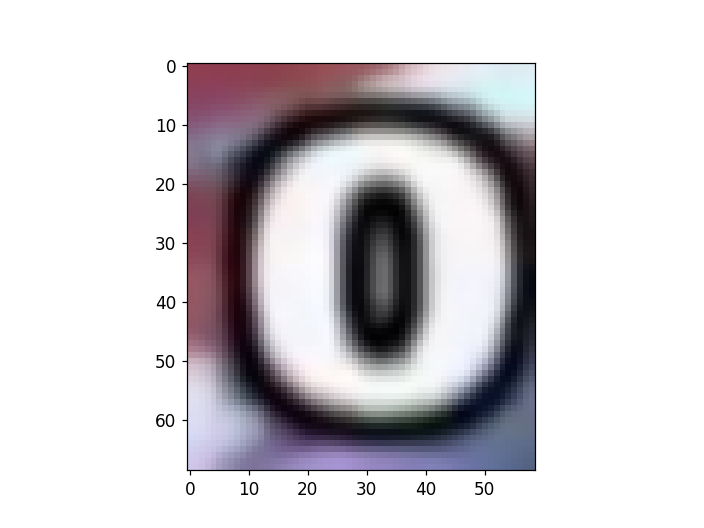

<IPython.core.display.Javascript object>


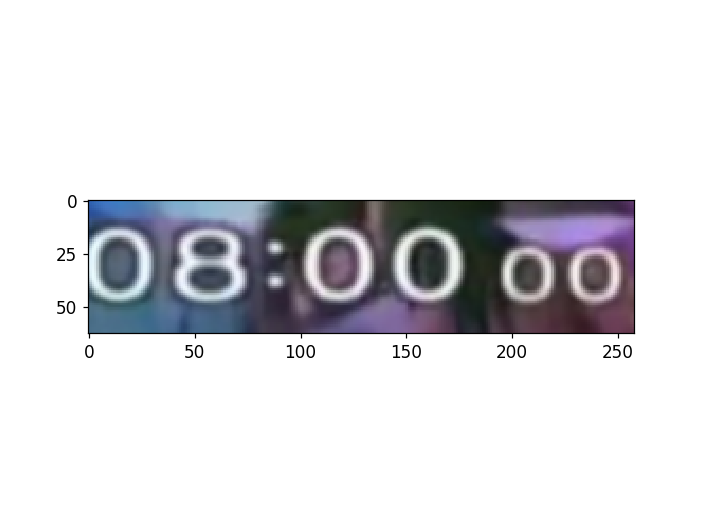

<IPython.core.display.Javascript object>


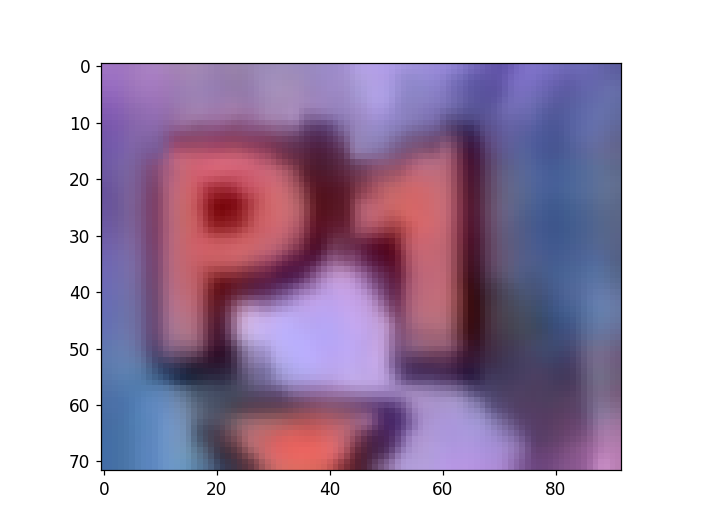

<IPython.core.display.Javascript object>


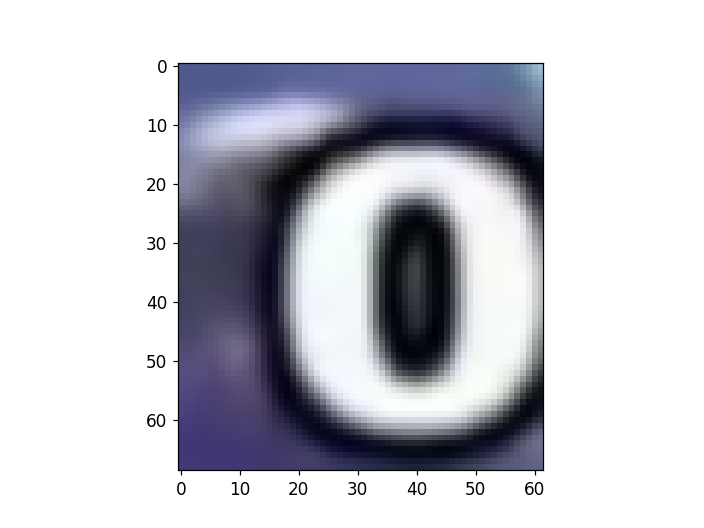

[{3: '0'}, {1: '080086'}, {3: ''}, {3: '0'}]

In [388]:
smash_bros_detector([img])


2


<IPython.core.display.Javascript object>


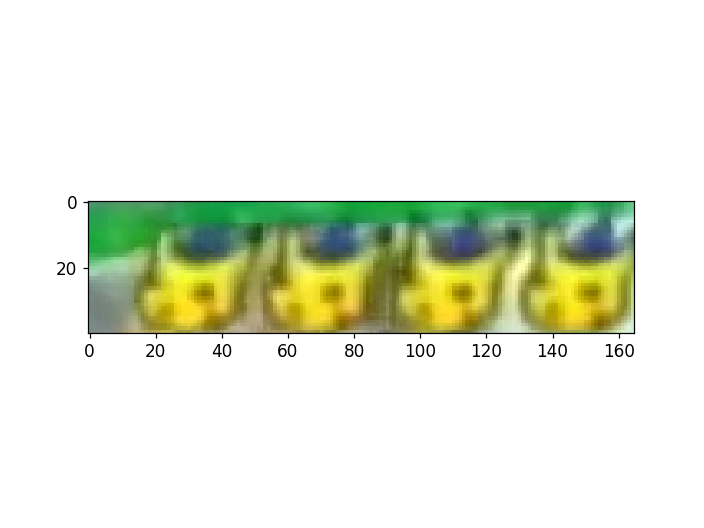

2


<IPython.core.display.Javascript object>


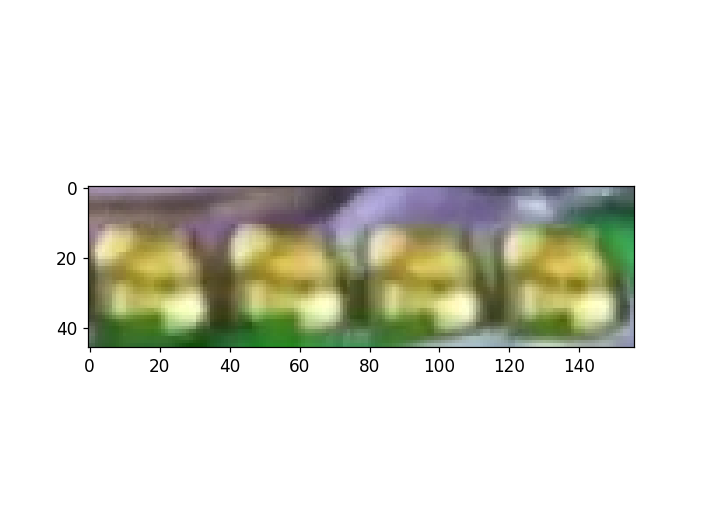

3


<IPython.core.display.Javascript object>


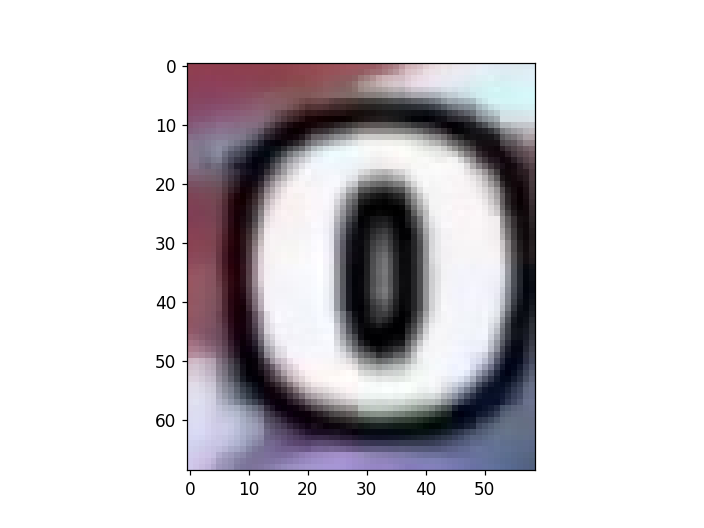

0


<IPython.core.display.Javascript object>


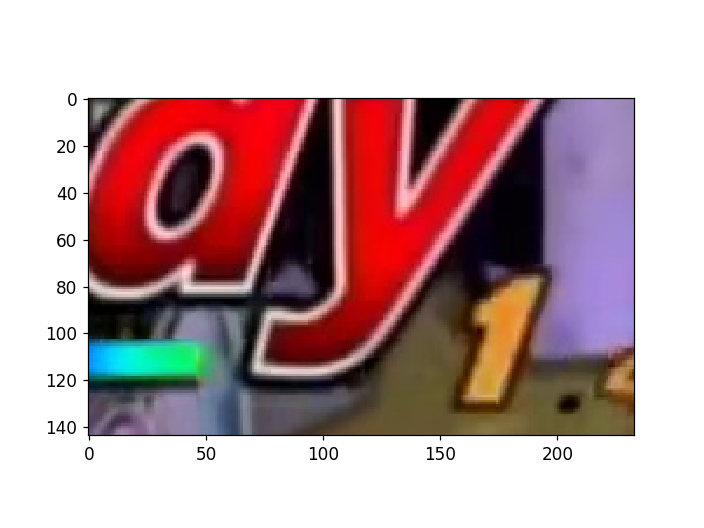

1


<IPython.core.display.Javascript object>


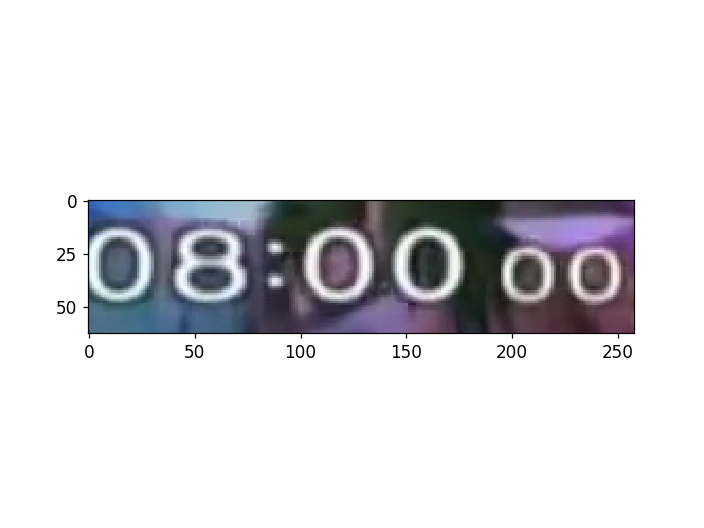

3


<IPython.core.display.Javascript object>


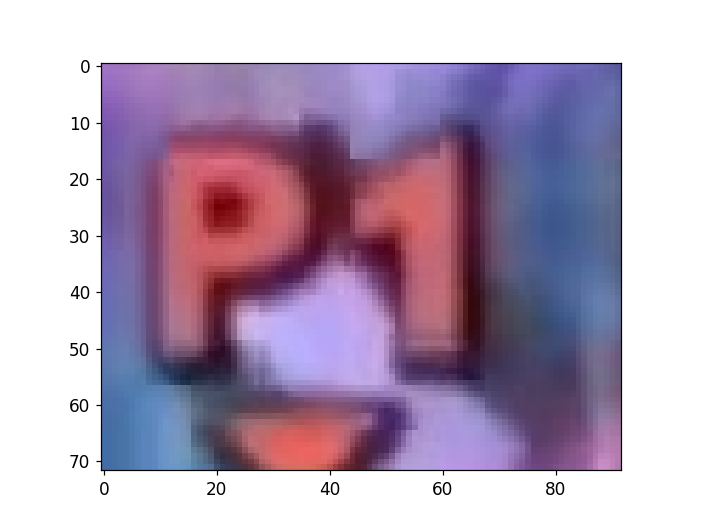

3


<IPython.core.display.Javascript object>


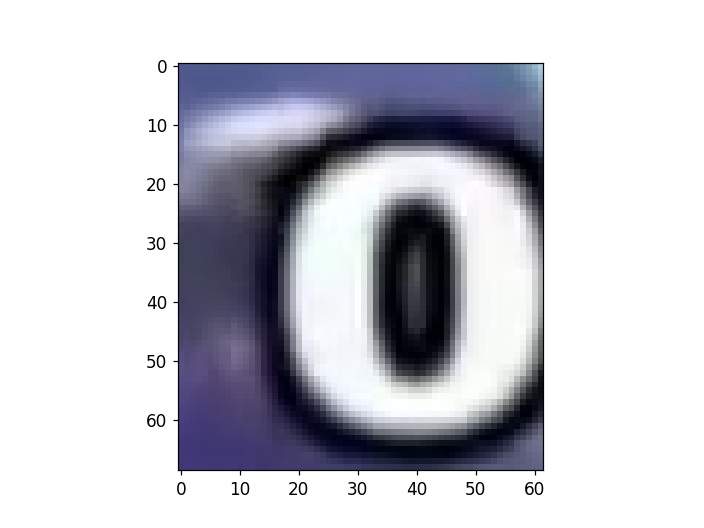

In [349]:
for det in smash_bros_detector([img]):
    print(det.cls)
    imshow(det.crop)